<a href="https://colab.research.google.com/github/sachinthadilshann/Temp_Forcasting_LSTM/blob/main/Temp_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/SLT/temp.csv", sep=';')

In [ ]:
df.head()

,"id;""device_id"";""sensor_value"";""timestamp"""
0,"2566;""Device0002a"";""1037.55"";""2023-07-11 07:38..."
1,"2567;""Device0002a"";""27.49"";""2023-07-11 07:38:21"""
2,"2568;""Device0002a"";""27.49"";""2023-07-11 07:38:22"""
3,"2569;""Device0002a"";""1037.55"";""2023-07-11 07:38..."
4,"2570;""Device0002a"";""27.05"";""2023-07-11 07:38:25"""


In [ ]:
df[['id', 'device_id', 'sensor_value', 'timestamp']] = df['id;"device_id";"sensor_value";"timestamp"'].str.split(';', expand=True)

In [ ]:
df.head()

,"id;""device_id"";""sensor_value"";""timestamp""",id,device_id,sensor_value,timestamp
0,"2566;""Device0002a"";""1037.55"";""2023-07-11 07:38...",2566,"""Device0002a""","""1037.55""","""2023-07-11 07:38:20"""
1,"2567;""Device0002a"";""27.49"";""2023-07-11 07:38:21""",2567,"""Device0002a""","""27.49""","""2023-07-11 07:38:21"""
2,"2568;""Device0002a"";""27.49"";""2023-07-11 07:38:22""",2568,"""Device0002a""","""27.49""","""2023-07-11 07:38:22"""
3,"2569;""Device0002a"";""1037.55"";""2023-07-11 07:38...",2569,"""Device0002a""","""1037.55""","""2023-07-11 07:38:23"""
4,"2570;""Device0002a"";""27.05"";""2023-07-11 07:38:25""",2570,"""Device0002a""","""27.05""","""2023-07-11 07:38:25"""


In [ ]:
df['device_id'] = df['device_id'].str.strip('"')
df['sensor_value'] = df['sensor_value'].str.strip('"')
df['timestamp'] = df['timestamp'].str.strip('"')

In [ ]:
df.drop('id;"device_id";"sensor_value";"timestamp"', axis=1, inplace=True)


In [ ]:
df.head()

,id,device_id,sensor_value,timestamp
0,2566,Device0002a,1037.55,2023-07-11 07:38:20
1,2567,Device0002a,27.49,2023-07-11 07:38:21
2,2568,Device0002a,27.49,2023-07-11 07:38:22
3,2569,Device0002a,1037.55,2023-07-11 07:38:23
4,2570,Device0002a,27.05,2023-07-11 07:38:25


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3124 entries, 0 to 3123
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            3124 non-null   object
 1   device_id     3124 non-null   object
 2   sensor_value  3124 non-null   object
 3   timestamp     3124 non-null   object
dtypes: object(4)
memory usage: 97.8+ KB


In [ ]:
df.drop('id', axis=1, inplace=True)

In [ ]:
df.head()

,device_id,sensor_value,timestamp
0,Device0002a,1037.55,2023-07-11 07:38:20
1,Device0002a,27.49,2023-07-11 07:38:21
2,Device0002a,27.49,2023-07-11 07:38:22
3,Device0002a,1037.55,2023-07-11 07:38:23
4,Device0002a,27.05,2023-07-11 07:38:25


In [ ]:
df.head()

,device_id,sensor_value,timestamp
0,Device0002a,1037.55,2023-07-11 07:38:20
1,Device0002a,27.49,2023-07-11 07:38:21
2,Device0002a,27.49,2023-07-11 07:38:22
3,Device0002a,1037.55,2023-07-11 07:38:23
4,Device0002a,27.05,2023-07-11 07:38:25


In [ ]:
df['sensor_value'].astype(float)

0       1037.55
1         27.49
2         27.49
3       1037.55
4         27.05
         ...   
3119      29.97
3120      29.99
3121      29.99
3122      74.00
3123      74.00
Name: sensor_value, Length: 3124, dtype: float64

In [ ]:
df.head()

,device_id,sensor_value,timestamp
0,Device0002a,1037.55,2023-07-11 07:38:20
1,Device0002a,27.49,2023-07-11 07:38:21
2,Device0002a,27.49,2023-07-11 07:38:22
3,Device0002a,1037.55,2023-07-11 07:38:23
4,Device0002a,27.05,2023-07-11 07:38:25


In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [ ]:
df.sort_values(by='timestamp', inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3124 entries, 0 to 3123
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   device_id     3124 non-null   object        
 1   sensor_value  3124 non-null   object        
 2   timestamp     3124 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 73.3+ KB


In [ ]:
df['sensor_value'] = df['sensor_value'].astype(float)

In [ ]:
df['timestamp'].value_counts()

2023-07-11 08:12:20    5
2023-07-11 08:12:18    5
2023-07-11 08:02:36    4
2023-07-11 07:57:05    4
2023-07-11 07:58:59    4
                      ..
2023-07-12 09:04:01    1
2023-07-12 09:03:59    1
2023-07-12 09:03:57    1
2023-07-12 09:03:56    1
2023-07-13 06:53:46    1
Name: timestamp, Length: 2317, dtype: int64

In [ ]:
df['device_id'] = df['device_id'].replace({"Device0001a": 1, "Device0002a": 0})


In [ ]:
df['device_id'].value_counts()

1    3062
0      62
Name: device_id, dtype: int64

In [ ]:
df = df.drop(df[(df['device_id'] == 0)].index)

In [ ]:
df.head(100)

,device_id,sensor_value,timestamp
56,1,28.91,2023-07-11 07:55:50
57,1,28.79,2023-07-11 07:55:51
58,1,28.83,2023-07-11 07:55:51
59,1,28.83,2023-07-11 07:55:51
60,1,28.79,2023-07-11 07:55:52
...,...,...,...
151,1,28.53,2023-07-11 07:56:54
152,1,28.53,2023-07-11 07:56:54
153,1,28.59,2023-07-11 07:56:54
154,1,28.57,2023-07-11 07:56:55


In [ ]:
df.head()

,device_id,sensor_value,timestamp
56,1,28.91,2023-07-11 07:55:50
57,1,28.79,2023-07-11 07:55:51
58,1,28.83,2023-07-11 07:55:51
59,1,28.83,2023-07-11 07:55:51
60,1,28.79,2023-07-11 07:55:52


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3062 entries, 56 to 3121
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   device_id     3062 non-null   int64         
 1   sensor_value  3062 non-null   float64       
 2   timestamp     3062 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 95.7 KB


In [ ]:

df.head()

,device_id,sensor_value,timestamp
56,1,28.91,2023-07-11 07:55:50
57,1,28.79,2023-07-11 07:55:51
58,1,28.83,2023-07-11 07:55:51
59,1,28.83,2023-07-11 07:55:51
60,1,28.79,2023-07-11 07:55:52


In [ ]:
df.drop('device_id', axis=1, inplace=True)

In [ ]:


df.head(300)

,sensor_value,timestamp
56,28.91,2023-07-11 07:55:50
57,28.79,2023-07-11 07:55:51
58,28.83,2023-07-11 07:55:51
59,28.83,2023-07-11 07:55:51
60,28.79,2023-07-11 07:55:52
...,...,...
351,26.99,2023-07-11 07:58:51
352,26.99,2023-07-11 07:58:51
353,27.03,2023-07-11 07:58:52
354,27.09,2023-07-11 07:58:52


In [ ]:
df.set_index('timestamp', inplace=True)

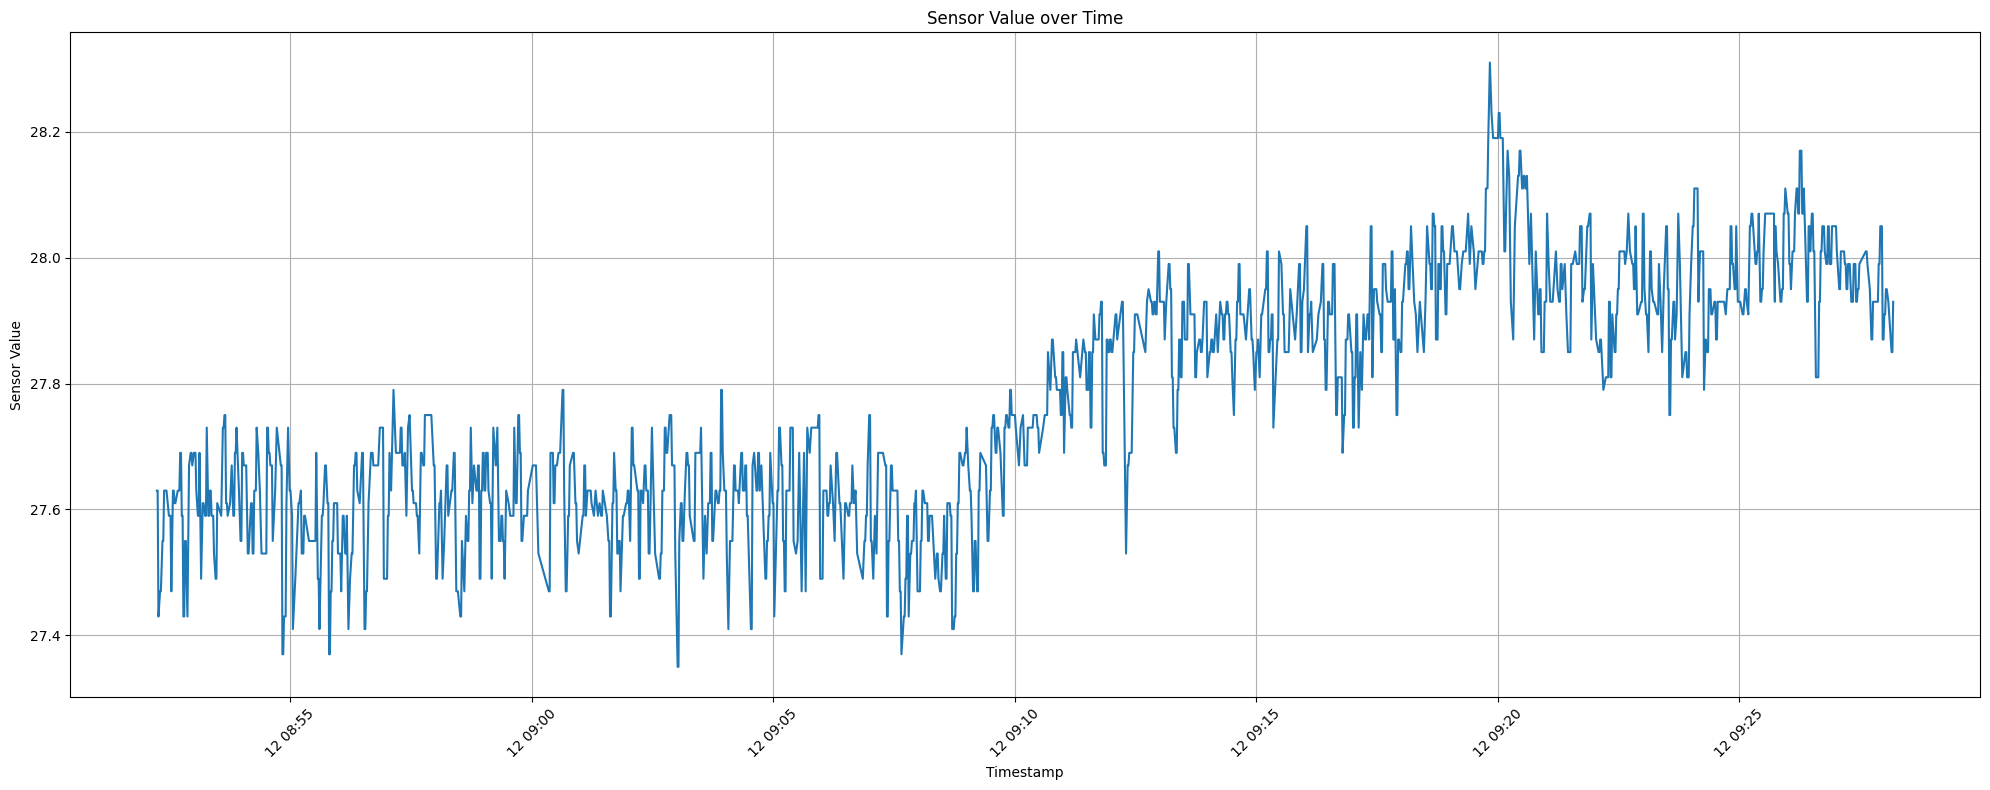

In [ ]:
start_timestamp = '2023-07-12 08:40:00'
end_timestamp = '2023-07-12 09:30:27'
df = df.loc[start_timestamp:end_timestamp]


plt.figure(figsize=(20, 8))
plt.plot(df.index, df['sensor_value'])
plt.xlabel('Timestamp')
plt.ylabel('Sensor Value')
plt.title('Sensor Value over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df.shape

(1332, 1)

In [ ]:
df.isnull().sum()

sensor_value    0
dtype: int64

In [ ]:
df.shape

(1332, 1)

In [ ]:
#df = df.iloc[1000:]
#df = df.iloc[:-1000]

In [ ]:
df.shape

(1332, 1)

In [ ]:
df.isnull().sum()

sensor_value    0
dtype: int64

In [ ]:
df.head()

,sensor_value
timestamp,
2023-07-12 08:52:14,27.63
2023-07-12 08:52:15,27.63
2023-07-12 08:52:16,27.43
2023-07-12 08:52:18,27.47
2023-07-12 08:52:19,27.47


In [ ]:
df.head(100)

,sensor_value
timestamp,
2023-07-12 08:52:14,27.63
2023-07-12 08:52:15,27.63
2023-07-12 08:52:16,27.43
2023-07-12 08:52:18,27.47
2023-07-12 08:52:19,27.47
...,...
2023-07-12 08:54:35,27.67
2023-07-12 08:54:37,27.67
2023-07-12 08:54:38,27.55


In [ ]:
#df['timestamp'] = pd.to_datetime(df['timestamp'])

In [ ]:
df.shape

(1332, 1)

<Axes: xlabel='timestamp'>

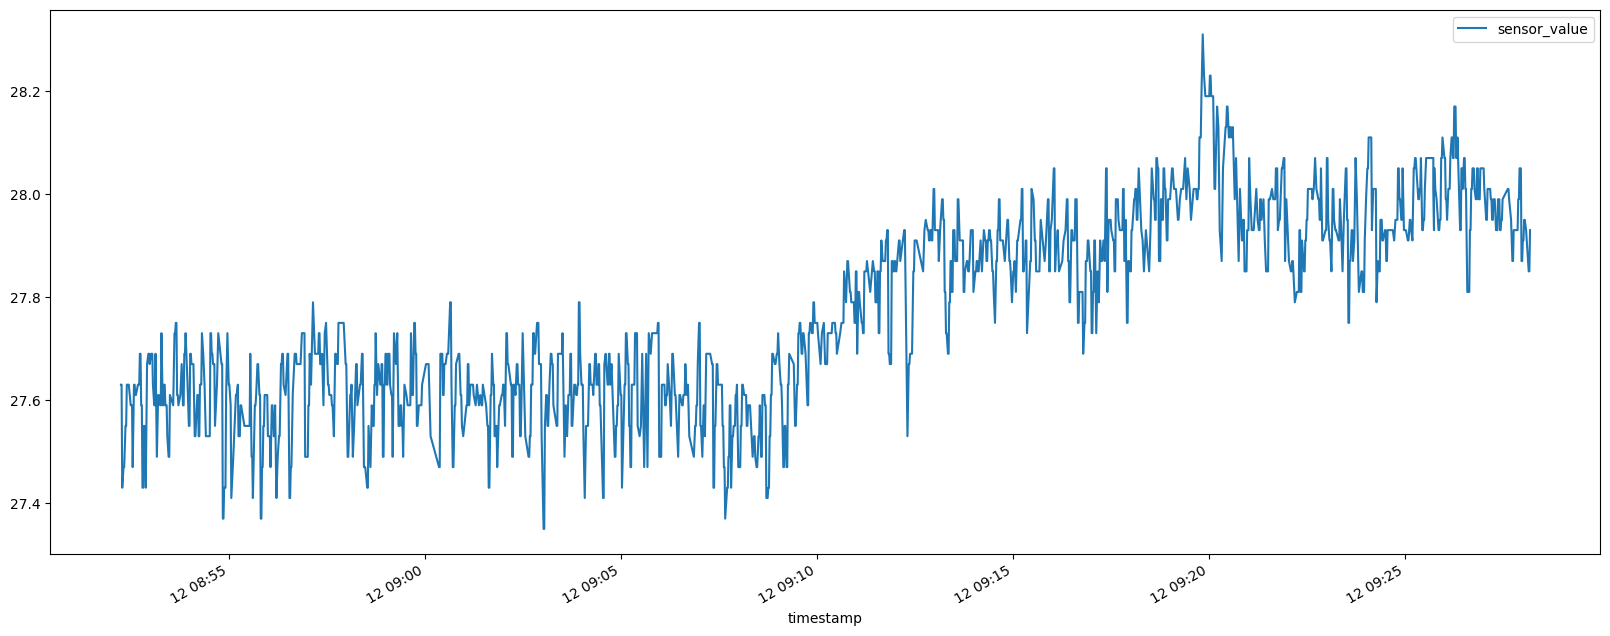

In [ ]:
df.plot(figsize=(20, 8))

In [ ]:
df = df.resample('10S').mean()


In [ ]:
df.head()

,sensor_value
timestamp,
2023-07-12 08:52:10,27.526000
2023-07-12 08:52:20,27.590000
2023-07-12 08:52:30,27.590000
2023-07-12 08:52:40,27.581111
2023-07-12 08:52:50,27.616667


In [ ]:
#df['sensor_value'] = df['sensor_value'].fillna(0)
df.shape

(217, 1)

In [ ]:
df.dropna(inplace=True)

<Axes: xlabel='timestamp'>

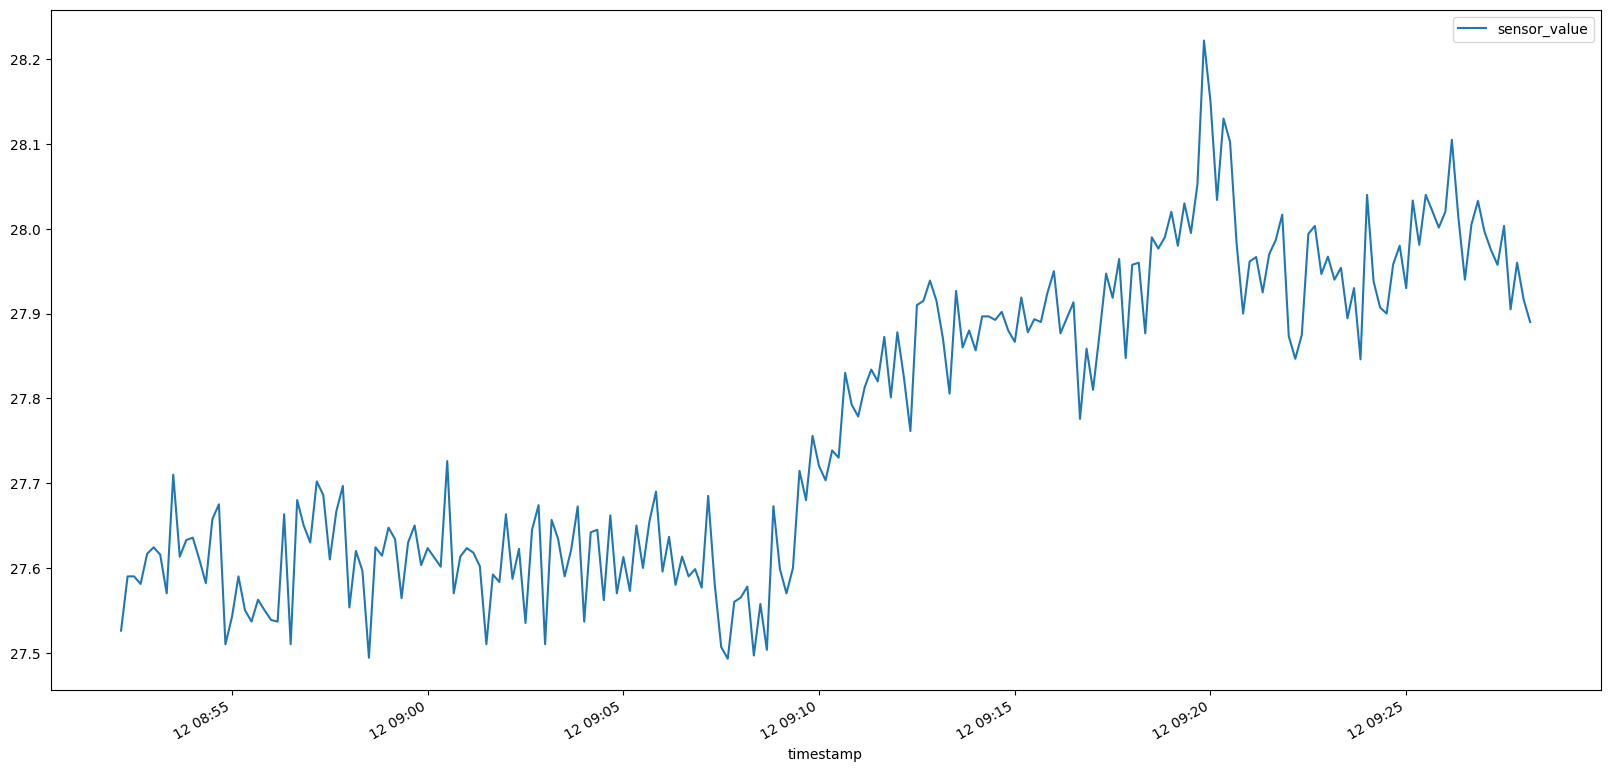

In [ ]:
df.plot(figsize=(20, 10))

In [ ]:
df.isnull().sum()

sensor_value    0
dtype: int64

In [ ]:
df.shape

(216, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
train = df.iloc[:180]
test = df.iloc[180:]

In [ ]:
test

,sensor_value
timestamp,
2023-07-12 09:22:20,27.875000
2023-07-12 09:22:30,27.994000
2023-07-12 09:22:40,28.003333
2023-07-12 09:22:50,27.946667
2023-07-12 09:23:00,27.967143
2023-07-12 09:23:10,27.940000
2023-07-12 09:23:20,27.954000
2023-07-12 09:23:30,27.894444
2023-07-12 09:23:40,27.930000


In [ ]:
train

,sensor_value
timestamp,
2023-07-12 08:52:10,27.526000
2023-07-12 08:52:20,27.590000
2023-07-12 08:52:30,27.590000
2023-07-12 08:52:40,27.581111
2023-07-12 08:52:50,27.616667
...,...
2023-07-12 09:21:30,27.970000
2023-07-12 09:21:40,27.986667
2023-07-12 09:21:50,28.016667


In [ ]:
df.isnull().sum()

sensor_value    0
dtype: int64

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
scaled_train[:8]

array([[0.04545455],
       [0.13322884],
       [0.13322884],
       [0.12103797],
       [0.16980146],
       [0.18025078],
       [0.1684953 ],
       [0.10579937]])

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator


In [ ]:
n_input = 10
n_features = 1
genertor = TimeseriesGenerator(scaled_train,scaled_train,length = n_input ,batch_size = 1)

In [ ]:
print(len(scaled_train),len(genertor))

180 170


In [ ]:
X,y = genertor[0]
print(X.flatten())
print(y)

[0.04545455 0.13322884 0.13322884 0.12103797 0.16980146 0.18025078
 0.1684953  0.10579937 0.29780564 0.16522989]
[[0.19200627]]


In [ ]:
df.shape

(216, 1)

In [ ]:
X.shape

(1, 10, 1)

In [ ]:
n_input = 10
genertor = TimeseriesGenerator(scaled_train,scaled_train,length = n_input ,batch_size = 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
from keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.summary()
model.compile(optimizer = 'adam',loss = 'mse',metrics=['accuracy', 'Precision', 'Recall'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 10, 100)           40800     
                                                                 
 dropout_4 (Dropout)         (None, 10, 100)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#model = Sequential()
#model.add(LSTM(100,activation = 'relu',input_shape=(n_input,n_features)))
#model.add(Dense(1))
#model.compile(optimizer = 'adam',loss = 'mse',metrics=['accuracy', 'Precision', 'Recall'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 10, 100)           40800     
                                                                 
 dropout_4 (Dropout)         (None, 10, 100)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(genertor,epochs=2000)

Epoch 1/1000
170/170 [==============================] - 5s 12ms/step - loss: 0.0251 - accuracy: 0.0118 - precision: 1.0000 - recall: 0.2071
Epoch 2/1000
170/170 [==============================] - 3s 18ms/step - loss: 0.0152 - accuracy: 0.0118 - precision: 1.0000 - recall: 0.2130
Epoch 3/1000
170/170 [==============================] - 3s 17ms/step - loss: 0.0140 - accuracy: 0.0118 - precision: 1.0000 - recall: 0.2485
Epoch 4/1000
170/170 [==============================] - 2s 13ms/step - loss: 0.0131 - accuracy: 0.0118 - precision: 1.0000 - recall: 0.2485
Epoch 5/1000
170/170 [==============================] - 2s 12ms/step - loss: 0.0102 - accuracy: 0.0118 - precision: 1.0000 - recall: 0.2544
Epoch 6/1000
170/170 [==============================] - 2s 13ms/step - loss: 0.0107 - accuracy: 0.0118 - precision: 1.0000 - recall: 0.2959
Epoch 7/1000
170/170 [==============================] - 3s 20ms/step - loss: 0.0125 - accuracy: 0.0118 - precision: 1.0000 - recall: 0.2604
Epoch 8/1000
170/170

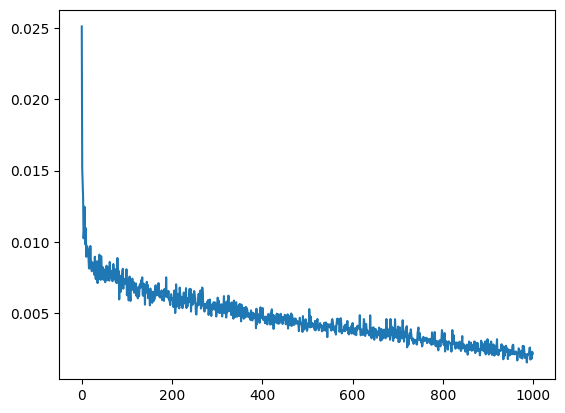

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
last_train_batch = scaled_train[-10:]

In [ ]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [ ]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 331ms/step


array([[0.70429295]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.52409875])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):

    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


1/1 [==============================] - 0s 24ms/step


In [ ]:
test_predictions

[array([0.70429295], dtype=float32),
 array([0.710768], dtype=float32),
 array([0.74041545], dtype=float32),
 array([0.8047495], dtype=float32),
 array([0.7174591], dtype=float32),
 array([0.73712885], dtype=float32),
 array([0.73864126], dtype=float32),
 array([0.7010362], dtype=float32),
 array([0.85375714], dtype=float32),
 array([0.83504236], dtype=float32),
 array([0.7555355], dtype=float32),
 array([0.77024126], dtype=float32),
 array([0.74015045], dtype=float32),
 array([0.5522585], dtype=float32),
 array([0.6613676], dtype=float32),
 array([0.60236734], dtype=float32),
 array([0.67592096], dtype=float32),
 array([0.66240454], dtype=float32),
 array([0.55765903], dtype=float32),
 array([0.5314568], dtype=float32),
 array([0.6069131], dtype=float32),
 array([0.49283907], dtype=float32),
 array([0.5366545], dtype=float32),
 array([0.5070399], dtype=float32),
 array([0.6028702], dtype=float32),
 array([0.57147115], dtype=float32),
 array([0.6073785], dtype=float32),
 array([0.62707

In [ ]:
test.head(15)

,sensor_value
timestamp,
2023-07-12 09:22:20,27.875000
2023-07-12 09:22:30,27.994000
2023-07-12 09:22:40,28.003333
2023-07-12 09:22:50,27.946667
2023-07-12 09:23:00,27.967143
2023-07-12 09:23:10,27.940000
2023-07-12 09:23:20,27.954000
2023-07-12 09:23:30,27.894444
2023-07-12 09:23:40,27.930000


In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions'] = true_predictions

In [ ]:
true_predictions

array([[28.00638732],
       [28.01110854],
       [28.03272578],
       [28.07963448],
       [28.01598731],
       [28.03032938],
       [28.03143214],
       [28.00401269],
       [28.11536807],
       [28.10172231],
       [28.04375044],
       [28.05447306],
       [28.03253256],
       [27.89553248],
       [27.9750886 ],
       [27.93206899],
       [27.98570009],
       [27.97584468],
       [27.89947024],
       [27.88036509],
       [27.93538349],
       [27.85220723],
       [27.88415492],
       [27.86256167],
       [27.93243566],
       [27.90954125],
       [27.93572283],
       [27.95008463],
       [27.91784087],
       [27.88873824],
       [27.91674828],
       [27.86082282],
       [27.88584379],
       [27.8611622 ],
       [27.91044944],
       [27.89649699]])

<Axes: xlabel='timestamp'>

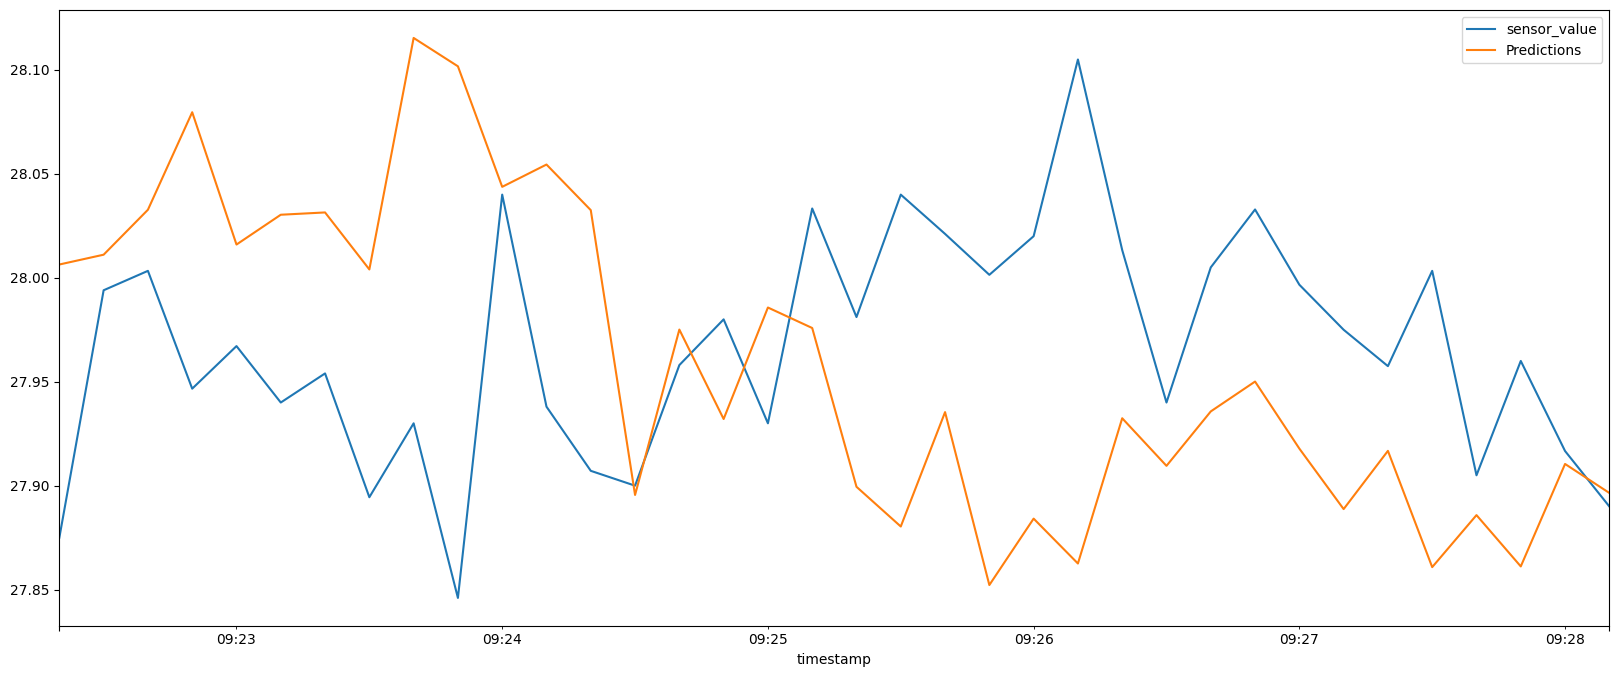

In [ ]:
test.plot(figsize=(20, 8))

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt


In [ ]:

rmse = sqrt(mean_squared_error(test['Predictions'], test['sensor_value']))
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 0.10628571452273357


In [ ]:

last_input_batch = scaled_test[-n_input:]
last_input_batch = last_input_batch.reshape((1, n_input, n_features))


In [ ]:
from datetime import datetime, timedelta

n_steps = 100

future_predictions = []

for i in range(n_steps):
    current_pred = model.predict(last_input_batch)[0]
    future_predictions.append(current_pred)
    last_input_batch = np.append(last_input_batch[:, 1:, :], [[current_pred]], axis=1)


1/1 [==============================] - 0s 26ms/step


In [ ]:
future_predictions = scaler.inverse_transform(future_predictions)
future_predictions

array([[27.98723102],
       [27.93709652],
       [27.9747224 ],
       [28.00765645],
       [27.98009692],
       [27.94279899],
       [27.93558627],
       [27.97589718],
       [27.9724038 ],
       [27.93134211],
       [27.98183129],
       [27.96874918],
       [27.98564511],
       [27.95903024],
       [27.9863446 ],
       [27.9879768 ],
       [27.990421  ],
       [28.0067606 ],
       [28.02355175],
       [28.02819479],
       [28.02068415],
       [28.07467966],
       [28.14140383],
       [28.07740697],
       [28.05582693],
       [28.09092095],
       [28.06722274],
       [28.00674313],
       [27.96468347],
       [27.96687921],
       [27.96675574],
       [27.94557884],
       [27.98090954],
       [27.94223583],
       [27.95058242],
       [27.85127253],
       [27.85584045],
       [27.92427304],
       [27.92504563],
       [27.93180566],
       [27.94660811],
       [27.93709556],
       [27.93936532],
       [27.9170056 ],
       [27.92458395],
       [27

In [ ]:
last_timestamp = test.index[-1]
future_timestamps = [last_timestamp + timedelta(seconds=(i + 1) * 10) for i in range(n_steps)]

In [ ]:
future_timestamps


[Timestamp('2023-07-12 09:28:20'),
 Timestamp('2023-07-12 09:28:30'),
 Timestamp('2023-07-12 09:28:40'),
 Timestamp('2023-07-12 09:28:50'),
 Timestamp('2023-07-12 09:29:00'),
 Timestamp('2023-07-12 09:29:10'),
 Timestamp('2023-07-12 09:29:20'),
 Timestamp('2023-07-12 09:29:30'),
 Timestamp('2023-07-12 09:29:40'),
 Timestamp('2023-07-12 09:29:50'),
 Timestamp('2023-07-12 09:30:00'),
 Timestamp('2023-07-12 09:30:10'),
 Timestamp('2023-07-12 09:30:20'),
 Timestamp('2023-07-12 09:30:30'),
 Timestamp('2023-07-12 09:30:40'),
 Timestamp('2023-07-12 09:30:50'),
 Timestamp('2023-07-12 09:31:00'),
 Timestamp('2023-07-12 09:31:10'),
 Timestamp('2023-07-12 09:31:20'),
 Timestamp('2023-07-12 09:31:30'),
 Timestamp('2023-07-12 09:31:40'),
 Timestamp('2023-07-12 09:31:50'),
 Timestamp('2023-07-12 09:32:00'),
 Timestamp('2023-07-12 09:32:10'),
 Timestamp('2023-07-12 09:32:20'),
 Timestamp('2023-07-12 09:32:30'),
 Timestamp('2023-07-12 09:32:40'),
 Timestamp('2023-07-12 09:32:50'),
 Timestamp('2023-07-

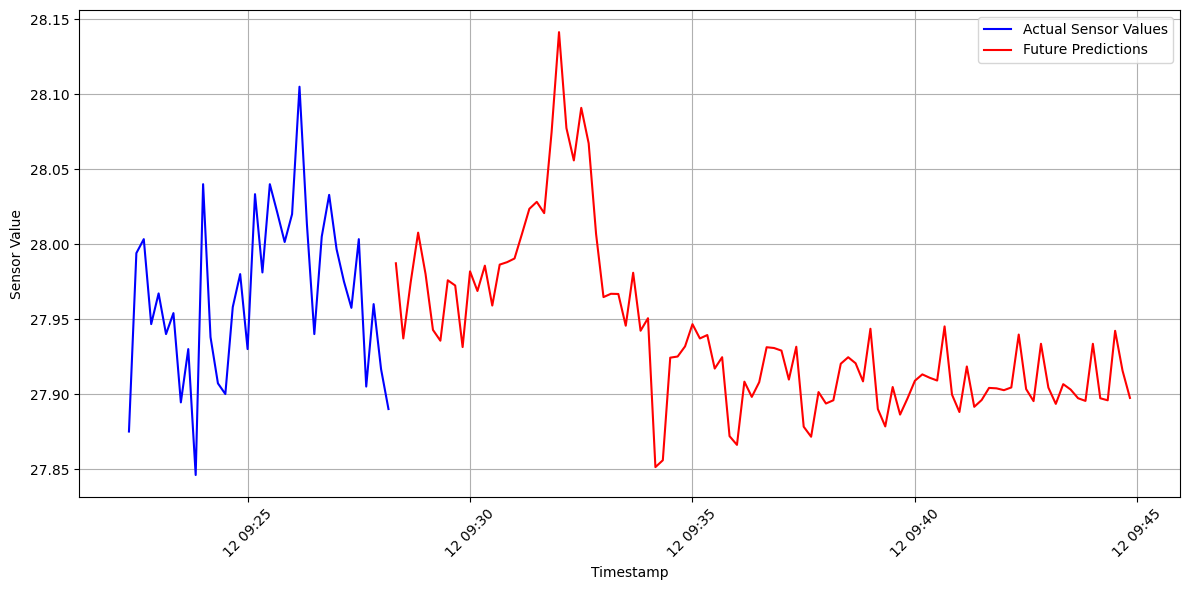

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['sensor_value'], label='Actual Sensor Values', color='blue')
plt.plot(future_timestamps, future_predictions, label='Future Predictions', color='red')
plt.xlabel('Timestamp')
plt.ylabel('Sensor Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
model.save('/content/drive/MyDrive/SLT/my_model2.h5')